In [4]:
!pip install kaggle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#confguring the kaggle.json path

In [7]:
#downloading dataset through api
!kaggle competitions download -c cifar-10

 94% 669M/715M [00:07<00:00, 70.1MB/s]
100% 715M/715M [00:07<00:00, 98.3MB/s]


In [8]:
!ls

cifar-10.zip  drive  kaggle.json  sample_data


In [9]:
#we need to extract the compressed file using zipfile library
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train.7z
drive	      sample_data  test.7z		 trainLabels.csv


In [11]:
!pip install py7zr
#to extract 7z files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 37.3 MB/s eta 0:00:00


In [12]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z','r')
archive.extractall()
print('The dataset is extracted')

The dataset is extracted


In [13]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [14]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [15]:
filename=os.listdir('/content/train')
#to explore the file train

In [16]:
type(filename)

list

In [17]:
len(filename)

50000

In [18]:
#test has 10000 train jas 50000 data

In [19]:
print(filename[:5])

['45155.png', '15916.png', '48284.png', '7697.png', '6308.png']


## Labels processing

In [20]:
labels=pd.read_csv('/content/trainLabels.csv')

In [21]:
print(labels)

          id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]


In [22]:
labels.shape

(50000, 2)

In [23]:
df=labels

In [24]:
df[df['id']==45155]

,id,label
45154,45155,truck


In [25]:
df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [26]:
labels_dict={'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'dog':8,'airplane':9}

In [27]:
labels=[labels_dict[i] for i in df['label']]

In [28]:
labels[0:5]

[0, 1, 1, 2, 3]

In [29]:
#handling images
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/7796.png')  #to numpy

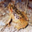

In [30]:
cv2_imshow(img)  # converts numpy to image

In [31]:
df[df['id']==7796]

,id,label
7795,7796,frog


In [32]:
id_ls=list(df['id'])

## Image Processing

In [33]:
train_data_folder='/content/train/' #adding forward slashes to access images in it

In [34]:
data=[]

for id in id_ls:

  image=Image.open(train_data_folder+str(id)+'.png')  #read using pillow
  image=np.array(image)  #converting to numpy array
  data.append(image)

In [35]:
len(data)

50000

In [36]:
type(data[0])

numpy.ndarray

In [37]:
data[0].shape

(32, 32, 3)

In [38]:
#32- height 32- width 3-color channel
#grey scale image HxW, rgb(color) scale image HxWxn
#n- red,green,blue  so it uses 3 32x32 matrices

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
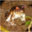

In [39]:
data[0]

In [40]:
#0 in all 3- black    255 in all 3-white
#we also need to ensure all images are of same shape if not resize it

In [41]:
#convert images(list) and labels(list) to numpy arrays

X=np.array(data)
Y=np.array(labels)
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000,)


# Train and Test Split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000,)
(10000,)


In [44]:
#converting array from 0 to 255 ---> 0 to 1
#we are going to do scaling down the pixel value(helps in increasing the performance of neural network)

In [45]:
#scaling down
#normalization
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [46]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

##**Neural Network Building**

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
n=10
# no.of classes
# input --> hidden --> output

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), #converted to 1d vector
    keras.layers.Dense(128,activation='relu'),    #hidden layer with 128(2^7) neurons
    keras.layers.Dense(64,activation='relu'),    #hidden layer with 64(2^6) neurons
    keras.layers.Dense(n,activation='softmax'),  #as we are having more than 2 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
#training neural network
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)
#in each epochs(forward and backward) it tries to update the weight

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2570 - loss: 2.0316 - val_accuracy: 0.3750 - val_loss: 1.7393
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3684 - loss: 1.7624 - val_accuracy: 0.3963 - val_loss: 1.6567
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3936 - loss: 1.6823 - val_accuracy: 0.3902 - val_loss: 1.6545
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4164 - loss: 1.6310 - val_accuracy: 0.4053 - val_loss: 1.6388
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4280 - loss: 1.5945 - val_accuracy: 0.4205 - val_loss: 1.5858
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4356 - loss: 1.5720 - val_accuracy: 0.4117 - val_loss: 1.6074
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4368 - loss: 1.5543 - val_accuracy: 0.4285 - val_loss: 1.5667
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4445 - loss: 1.5494 - 

In [51]:
#loss - difference between true and predicted value

In [52]:
#as we see that we can't get good accuracy
#we use transfer learning(trained for an another similar dataset earlier)

## **ResNet50**

In [53]:
from tensorflow.keras import Sequential,models,layers
#layers
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
#models
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [54]:
convolutional_based = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
#imagenet - image data base with 14 million image dataset
#and now we are going to use those weights that we got while they trained imagenet
#cifar-10 is similar to imagenet so we are using it
#include_top=False - to remove the output layer. we need to use ours
#these layers used apart from input,hidden,output becoz it can capture the information from image better

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
convolutional_based.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [56]:
no_of_classes=10
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_based)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(no_of_classes,activation='softmax'))

In [57]:
#upsampling - converting 32x32 to 256x256
#32x2x2x2=256 as resnet uses 256x256 as input shape

#batchnorm not needed if we already used norm but batchnorm improved efficiency most of the time
#batchnorm makes sure each time the values are normalized after processing in each layer

#dropout- to avoid overfitting
#During training, a fraction of neurons (typically 20-50%) are randomly dropped out, meaning their outputs are set to zero

In [58]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 430s 339ms/step - accuracy: 0.2521 - loss: 2.3072 - val_accuracy: 0.7582 - val_loss: 0.8734
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 419s 341ms/step - accuracy: 0.6782 - loss: 1.0655 - val_accuracy: 0.8960 - val_loss: 0.4392
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 432s 333ms/step - accuracy: 0.8161 - loss: 0.7139 - val_accuracy: 0.9155 - val_loss: 0.3324
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 395s 345ms/step - accuracy: 0.8814 - loss: 0.5422 - val_accuracy: 0.9275 - val_loss: 0.2748
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 437s 341ms/step - accuracy: 0.9222 - loss: 0.4087 - val_accuracy: 0.9295 - val_loss: 0.2533
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 340ms/step - accuracy: 0.9448 - loss: 0.3228 - val_accuracy: 0.9312 - val_loss: 0.2564
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 332ms/step - accuracy: 0.9585 - loss: 0.2605 - val_accuracy: 0.9315 - val_loss: 0.2485
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - ac

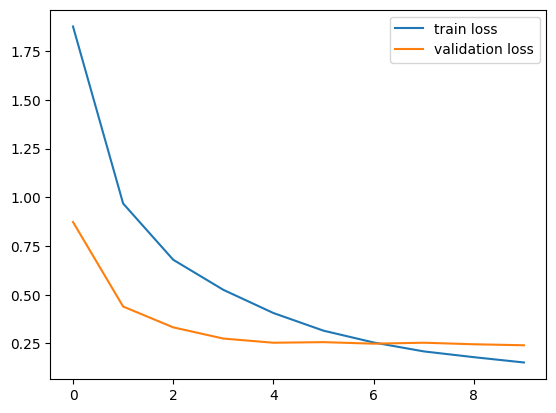

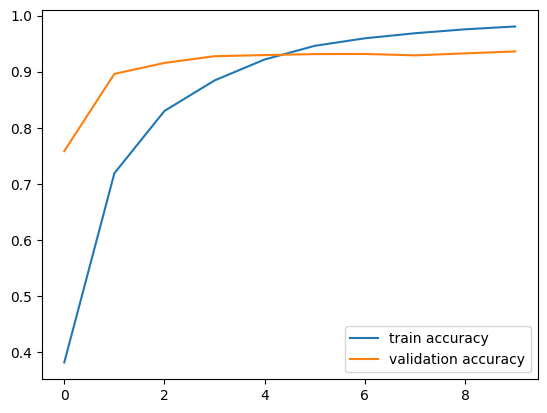

In [60]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [61]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step - accuracy: 0.9319 - loss: 0.2646
Test Accuracy = 0.9336000084877014
